In [1]:
import pandas as pd
import matplotlib.pyplot as plt 


### show downloaded files

In [2]:
import os
arr = os.listdir('data')
arr

['14_bevoelkerungsvorausberechnung_daten.csv',
 'Sterberate 2000_2022_tage.xlsx',
 'Sterberate pro Altersgruppe 2000-2016.xlsx',
 'Sterberate pro Altersgruppe 2016-2022.xlsx']

In [3]:
bevoelkerungsvorausberechnung_df = pd.read_csv("data/14_bevoelkerungsvorausberechnung_daten.csv",delimiter=';')

In [4]:
cols = bevoelkerungsvorausberechnung_df.columns
bevoelkerungsvorausberechnung_df[cols[0:5]].loc[(bevoelkerungsvorausberechnung_df['Simulationsjahr'] < 2022) & (bevoelkerungsvorausberechnung_df['Simulationsjahr'] > 2010)].head(3)

,Variante,Simulationsjahr,mw,Bev,Bev_0_1
122,0,2011,m,39230,337
123,0,2011,w,41098,321
124,0,2012,m,39377,346


## Sterberate pro Altersgruppe 2016-2022

In [5]:
sterberate_16_22 = pd.read_excel('data/Sterberate pro Altersgruppe 2016-2022.xlsx','D_2016_2022_Tage')

In [6]:
sterberate_16_22.rename(columns = {'Stand: 02.05.2022':'year', 'Unnamed: 367':'Insgesamt'}, inplace = True)
df_16_22 = sterberate_16_22[['year','Insgesamt']][9:].sort_values('year')

## Sterberate pro Altersgruppe 2000-2016

In [7]:
sterberate_00_16 = pd.read_excel('data/Sterberate pro Altersgruppe 2000-2016.xlsx','D_2000_2015_Tage')

In [8]:
sterberate_00_16.rename(columns = {'Unnamed: 0':'year', 'Unnamed: 367':'Insgesamt'}, inplace = True)

In [9]:
df_00_16 = sterberate_00_16[['year','Insgesamt']][9:].sort_values('year')

In [10]:
# Stack the DataFrames on top of each other
vertical_stack = pd.concat([df_00_16, df_16_22], axis=0)

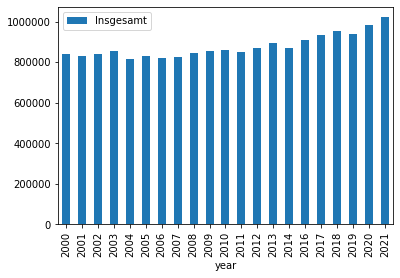

In [11]:
vertical_stack.plot(x='year',y='Insgesamt',kind='bar')

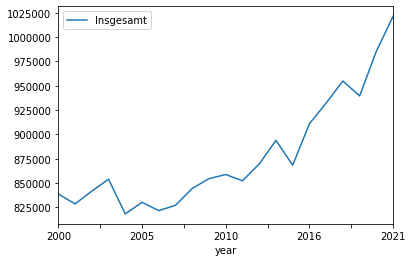

In [15]:
vertical_stack.plot(x='year',y='Insgesamt',kind='line')

# Tägliche Sterberate

In [60]:
sterberate_2000_2022_tag = pd.read_excel('data/Sterberate 2000_2022_tage.xlsx','Sheet2')

In [61]:
cols = sterberate_2000_2022_tag.columns

In [62]:
cols[1:]

Index(['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014',
       '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005',
       '2004', '2003', '2002', '2001', '2000'],
      dtype='object')

In [63]:
sterberate_2000_2022_tag[cols[1:]] = sterberate_2000_2022_tag[cols[1:]].apply(pd.to_numeric)

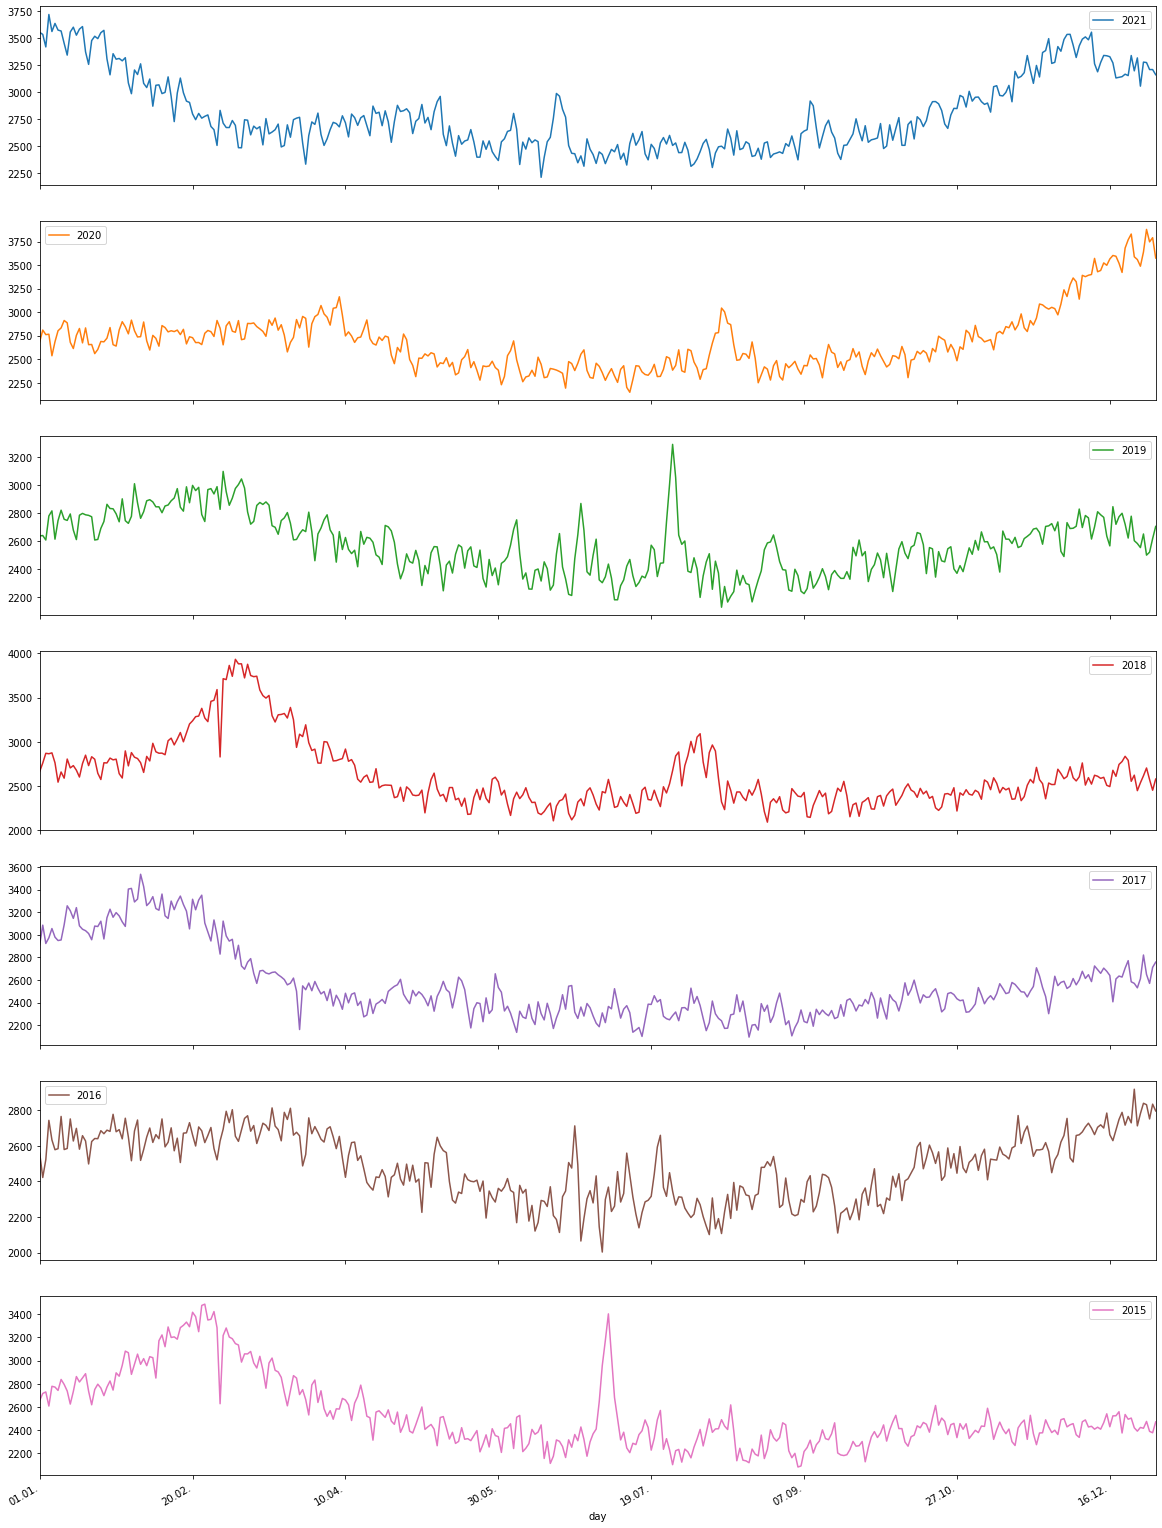

In [64]:
sterberate_2000_2022_tag[:-1].plot(x='day',y=cols[2:-15],kind='line',figsize=(20, 30), subplots=True)
print('')

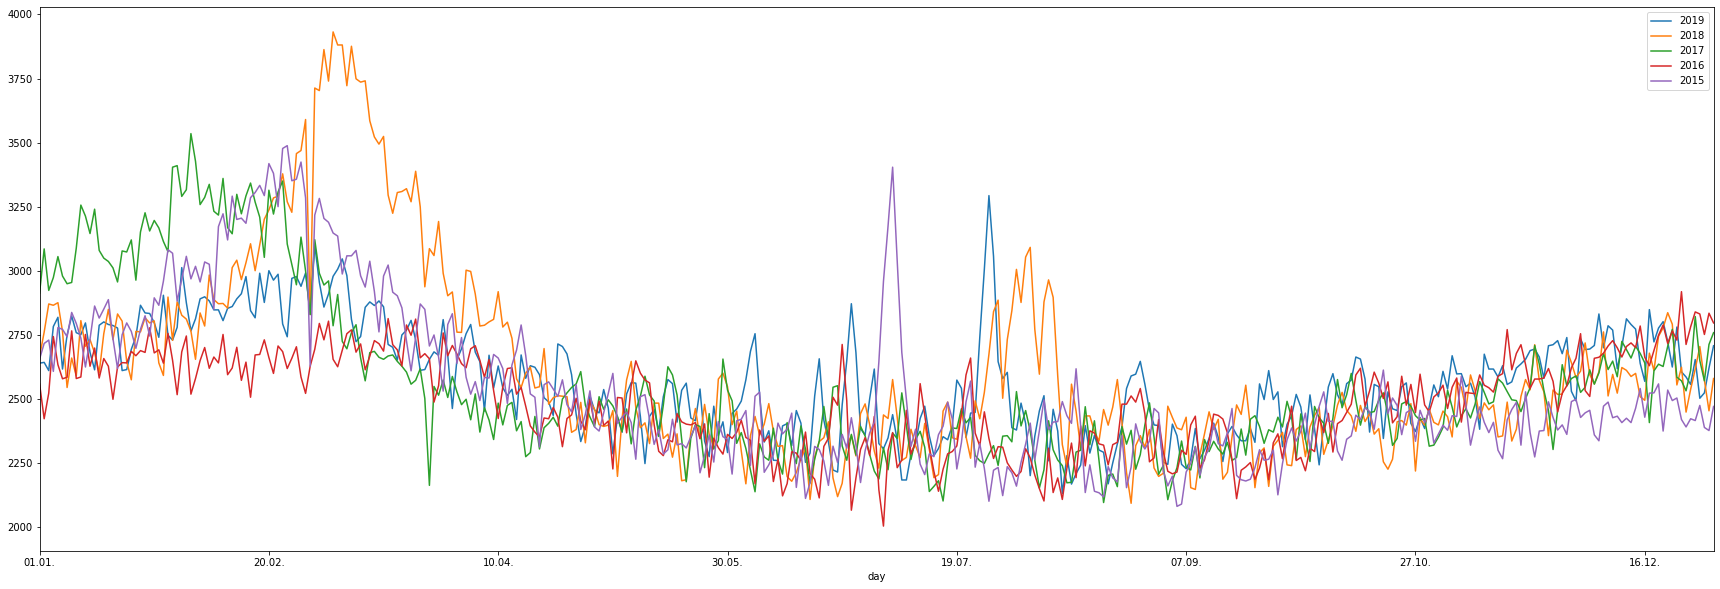

In [65]:
sterberate_2000_2022_tag[:-1].plot(x='day',y=cols[4:-15],kind='line',figsize=(30, 10), subplots=False)
print('')

In [23]:
idx = sterberate_2000_2022_tag[['2019']][:-1].idxmax()
sterberate_2000_2022_tag[['day','2019']].iloc[idx]

,day,2019
207,26.07.,3293


from scipy.signal import lfilter

n = 10  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,ster

from scipy.signal import lfilter

n = 10000  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,sterberate_2000_2022_tag[['2019']][:-1])
yy = pd.DataFrame(yy)

smoothdf = pd.concat([sterberate_2000_2022_tag[['day']][:-1], yy], axis=1, join='inner')

#plt.plot(x=sterberate_2000_2022_tag[['day']], y=yy, linewidth=2, linestyle="-", c="b")  # smooth by filter
#smoothdf.plot(x='day',y='2019',kind='line', subplots=False)

In [86]:
# sterberate_2000_2022_tag[:-1].ewm(span = 10).mean().plot(kind='line',x = 'day', figsize=(20, 10), label = ' Exponential moving average')
sterberate_2000_2022_tag[:-1].head()


,day,2022,2021,2020,2019,2018,2017,2016,2015,2014,...,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
0,01.01.,2997.0,3553,2685,2639,2665,2912,2558,2655,2385,...,2765,2584,2480,2399,2393,2418,2560,2534,2540,2626
1,02.01.,2875.0,3534,2809,2642,2760,3085,2422,2716,2493,...,2764,2646,2506,2464,2304,2558,2742,2450,2650,2618
2,03.01.,3026.0,3418,2761,2610,2870,2923,2522,2729,2556,...,2696,2706,2435,2400,2483,2431,2632,2503,2482,2603
3,04.01.,3048.0,3719,2765,2782,2865,2973,2743,2607,2377,...,2666,2675,2412,2374,2428,2442,2470,2420,2462,2612
4,05.01.,2914.0,3561,2536,2818,2875,3055,2633,2778,2413,...,2968,2636,2477,2354,2449,2513,2535,2512,2511,2631


# Sterbefälle nach Kalenderwochen

In [124]:
#reading the data
sterberate_pro_week_df = pd.read_excel('data/Sterberate 2000_2022_tage.xlsx','wochent')

,weekindex,2021,2020,2019,2018,2017,2016
0,1,24849,18883,18686,19342,20918,18467
1,2,24503,19408,19170,18770,22070,18439


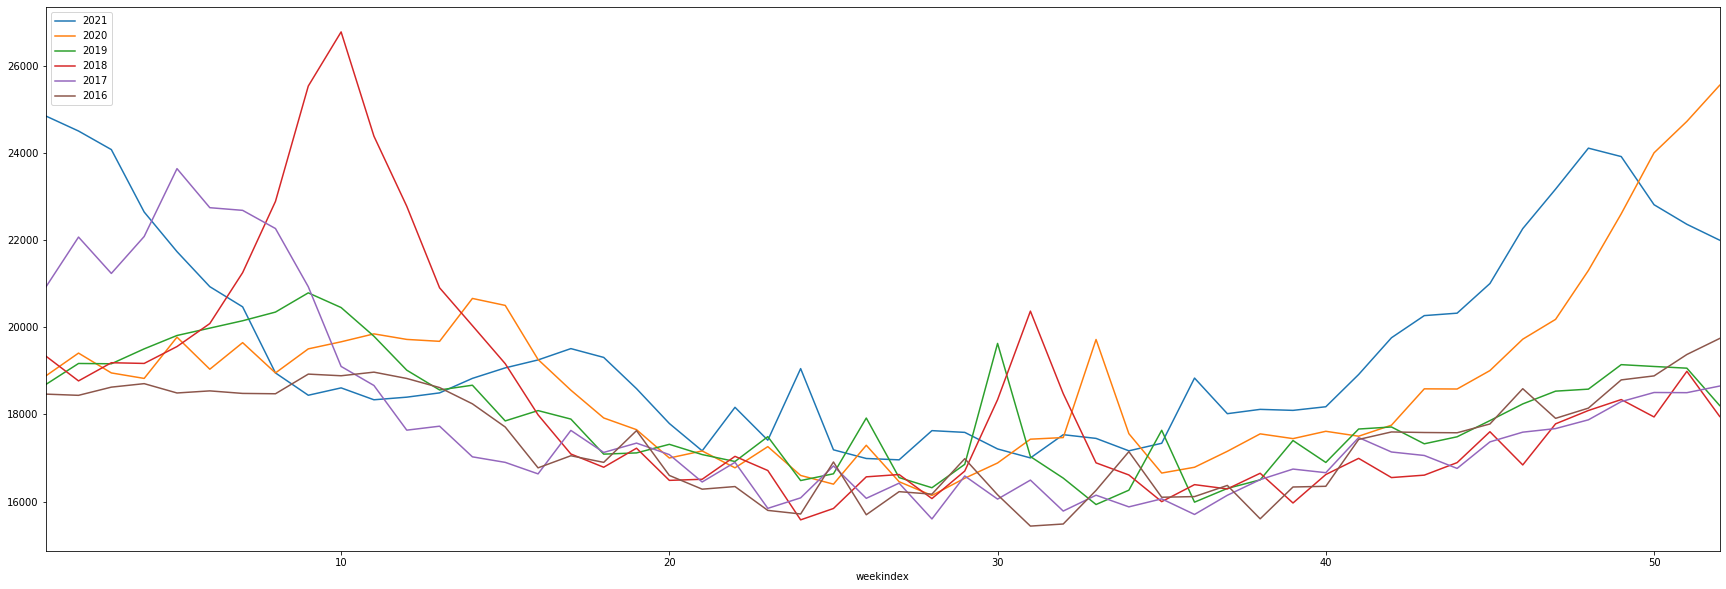

In [136]:
#plotting the data
#sterberate_pro_week_df.plot(x='day',y=cols[2:-15],kind='line',figsize=(20, 30), subplots=True)
sterberate_pro_week_df[:-1].plot(x='weekindex',y=sterberate_pro_week_df.columns[1:],kind='line',figsize=(30, 10), subplots=False)
sterberate_pro_week_df.head(2)


# Sterbefälle nach Altergruppen im Jahr 2021

In [138]:
#reading the data
sterberate_pro_altergruppe_df = pd.read_excel('data/Sterberate 2000_2022_tage.xlsx','2021altergruppensterbrat')

In [139]:
sterberate_pro_altergruppe_df.head(2)

,Nr.,Unnamed: 1,altergruppe,1,2,3,4,5,6,7,...,44,45,46,47,48,49,50,51,52,sum
0,18,2021,0-30,119,124,130,147,136,109,115,...,138,134,162,144,158,131,143,151,126,7406
1,19,2021,30-35,50,51,56,58,60,46,37,...,56,49,44,49,63,55,54,50,49,2712


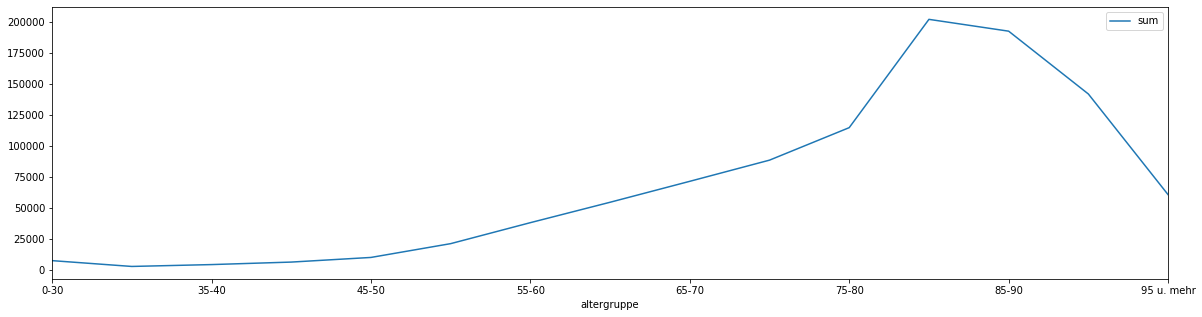

In [144]:
sterberate_pro_altergruppe_df.plot(x='altergruppe',y='sum',kind='line',figsize=(20, 5), subplots=False)

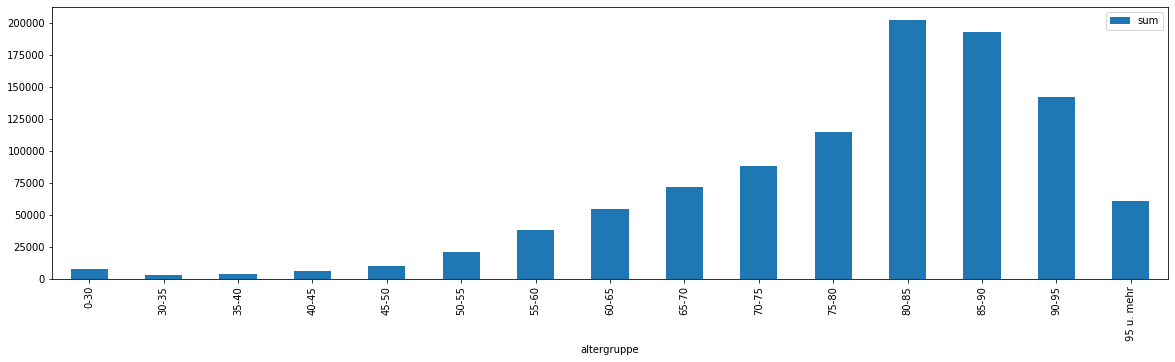

In [145]:
sterberate_pro_altergruppe_df.plot(x='altergruppe',y='sum',kind='bar',figsize=(20, 5), subplots=False)
#es fehlt die Populationgroße für jede Altergruppe